In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [2]:
# Uploaded from C:\Users\wel51x\Box\MyBox\Data\
df = pd.read_csv("nba.csv")
dummies_df = df[["Year", "Pos", "TRB", "PTS"]]
dummies_df = dummies_df[(dummies_df.Pos == "PG") | (dummies_df.Pos == "C") | (dummies_df.Pos == "SF") | (dummies_df.Pos == "SG") | (dummies_df.Pos == "PF")]
dummies_df

,Year,Pos,TRB,PTS
1,1950.0,SG,NaN,279.0
2,1950.0,SF,NaN,438.0
11,1950.0,PG,NaN,242.0
13,1950.0,SF,NaN,612.0
15,1950.0,C,NaN,779.0
...,...,...,...,...
24686,2017.0,PF,405.0,639.0
24687,2017.0,C,124.0,178.0
24688,2017.0,C,35.0,23.0
24689,2017.0,SF,125.0,240.0


PF    4966
SG    4811
C     4759
SF    4699
PG    4648
Name: Pos, dtype: int64


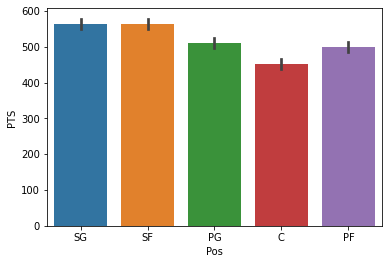

In [3]:
print(dummies_df.Pos.value_counts())
#sns.set(rc = {'figure.figsize':(5,4)})
sns.barplot(data=dummies_df, x="Pos", y="PTS")

**Clean data and dummify position**

In [4]:
dummies = pd.get_dummies(dummies_df.Pos)
dummies.drop("SG", axis = 1, inplace=True)
dummies_df = dummies_df.join(dummies)
dummies_df.drop("Pos", axis = 1, inplace=True)
dummies_df

,Year,TRB,PTS,C,PF,PG,SF
1,1950.0,NaN,279.0,0,0,0,0
2,1950.0,NaN,438.0,0,0,0,1
11,1950.0,NaN,242.0,0,0,1,0
13,1950.0,NaN,612.0,0,0,0,1
15,1950.0,NaN,779.0,1,0,0,0
...,...,...,...,...,...,...,...
24686,2017.0,405.0,639.0,0,1,0,0
24687,2017.0,124.0,178.0,1,0,0,0
24688,2017.0,35.0,23.0,1,0,0,0
24689,2017.0,125.0,240.0,0,0,0,1


In [5]:
X = dummies_df[list(dummies_df.columns[3:])]

y = dummies_df.PTS

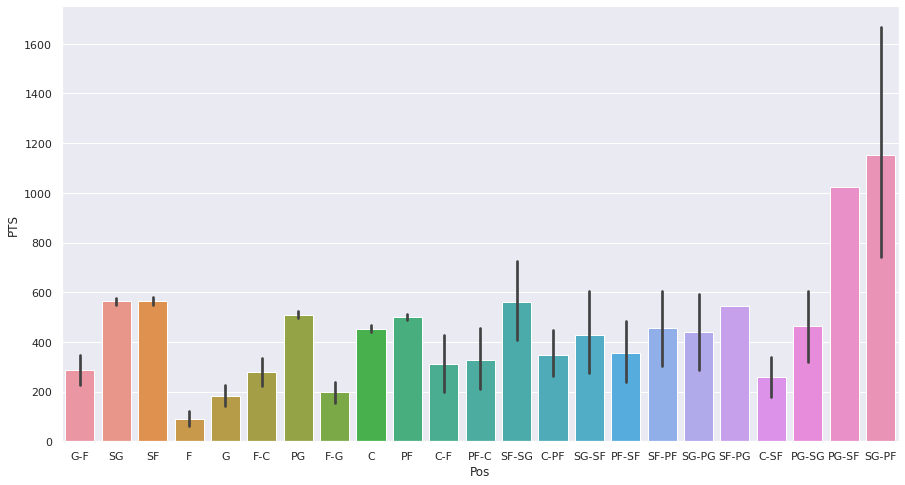

In [6]:
# Just for yuks
#print(df.Pos.value_counts())
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=df, x="Pos", y="PTS")

**Define model type and fit**

In [7]:
# Step 1: define model
lm = linear_model.LinearRegression()

# Step 2: fit X to Y
lm.fit(X, y)

LinearRegression()

**Results**

In [8]:
print("coeff = ", lm.coef_, "intercept = ", lm.intercept_)

coeff =  [-110.31849911  -62.51975248  -53.33225695    0.85871554] intercept =  562.6973602161712


In [9]:
Pos = ["SG", "C", "PF", "PG", "SF"]
for i in range(5):
  if i == 0:
    print("For Position =", Pos[i], "==> Points scored prediction is", lm.intercept_)
  else:
    print("For Position =", Pos[i], "==> Points scored prediction is", lm.intercept_ + lm.coef_[i-1])

For Position = SG ==> Points scored prediction is 562.6973602161712
For Position = C ==> Points scored prediction is 452.3788611052742
For Position = PF ==> Points scored prediction is 500.1776077325816
For Position = PG ==> Points scored prediction is 509.3651032702238
For Position = SF ==> Points scored prediction is 563.5560757608


In [10]:
# ?????
lm.predict([range(4)])

array([396.08924047])